In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stat
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, binarize
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc, make_scorer

from os import system

In [2]:
buyer_values = pd.read_csv("C:\\BuyerValue\\Buyer_Value_Round_2 Extension No.csv")

In [3]:
buyer_values.describe()

,Rev_,AO_,SI_,IO_,Low_Risk,Other,Prod_imp,Fair_Price,Value_Prop,Deal_Shape,...,team_skills,tech_sol_approach,scalability,TC_Compliance,Delivery_speed,Total_Curr_revenue,TS_rev,SG_AO,SG_SI,SG_IO
count,4.547000e+03,4.547000e+03,4.547000e+03,4.547000e+03,1053.000000,522.000000,911.000000,2868.000000,1039.000000,501.000000,...,2110.000000,1776.000000,612.000000,157.000000,977.000000,4.547000e+03,4.547000e+03,4.547000e+03,4.547000e+03,4.547000e+03
mean,-1.309105e+06,-3.465941e+05,-5.786642e+05,-3.718246e+05,4.087369,4.216475,4.144896,4.231520,4.220404,3.948104,...,4.302370,4.202140,4.035948,3.745223,4.120778,8.258981e+06,6.343170e+06,2.583861e+06,2.561329e+06,1.327288e+06
std,1.556332e+07,9.987739e+06,6.265456e+06,7.258869e+06,1.050965,1.057410,0.993868,1.004397,0.970930,1.114137,...,1.002389,0.951924,0.921829,1.165225,1.028163,2.269514e+07,1.666703e+07,1.100363e+07,6.779263e+06,8.112941e+06
min,-3.551197e+08,-2.327267e+08,-1.368805e+08,-2.382788e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.364983e+06,0.000000e+00,-2.357840e+05,0.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,6.602530e+05,4.688935e+05,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,4.000000,2.378207e+06,1.748563e+06,0.000000e+00,4.617420e+05,0.000000e+00
75%,2.197800e+04,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,7.179611e+06,5.515304e+06,6.018000e+05,2.141242e+06,0.000000e+00
max,2.127792e+08,2.092510e+08,1.285238e+08,2.324204e+08,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.293845e+08,3.551197e+08,2.327267e+08,1.368805e+08,2.382788e+08


In [4]:
buyer_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 35 columns):
opp_name                 4547 non-null object
Market                   4547 non-null object
MU                       4547 non-null object
master_client            4547 non-null object
prim_industry            4520 non-null object
Fiscal                   4547 non-null object
Stage                    4547 non-null object
Rev_                     4547 non-null int64
AO_                      4547 non-null int64
SI_                      4547 non-null int64
IO_                      4547 non-null int64
Cust_relation            4547 non-null object
Low_Risk                 1053 non-null float64
Other                    522 non-null float64
Prod_imp                 911 non-null float64
Fair_Price               2868 non-null float64
Value_Prop               1039 non-null float64
Deal_Shape               501 non-null float64
Relationship             999 non-null float64
Ease_of_busin       

In [5]:
for i in buyer_values.columns: 
    print( i , ":" , buyer_values[i].nunique())

opp_name : 4509
Market : 3
MU : 19
master_client : 1545
prim_industry : 19
Fiscal : 11
Stage : 4
Rev_ : 2994
AO_ : 981
SI_ : 2164
IO_ : 465
Cust_relation : 1
Low_Risk : 5
Other : 5
Prod_imp : 5
Fair_Price : 5
Value_Prop : 5
Deal_Shape : 5
Relationship : 5
Ease_of_busin : 5
Track_record_solution : 5
team_skills : 5
tech_sol_approach : 5
scalability : 5
TC_Compliance : 5
Delivery_speed : 5
Total_Curr_revenue : 4259
TS_rev : 4279
Deal_size : 3
SG_AO : 1385
SG_SI : 3106
SG_IO : 686
reason : 1
Extension : 1
Cloud : 2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6F06CDFD0>,
      dtype=object)

<Figure size 720x720 with 0 Axes>

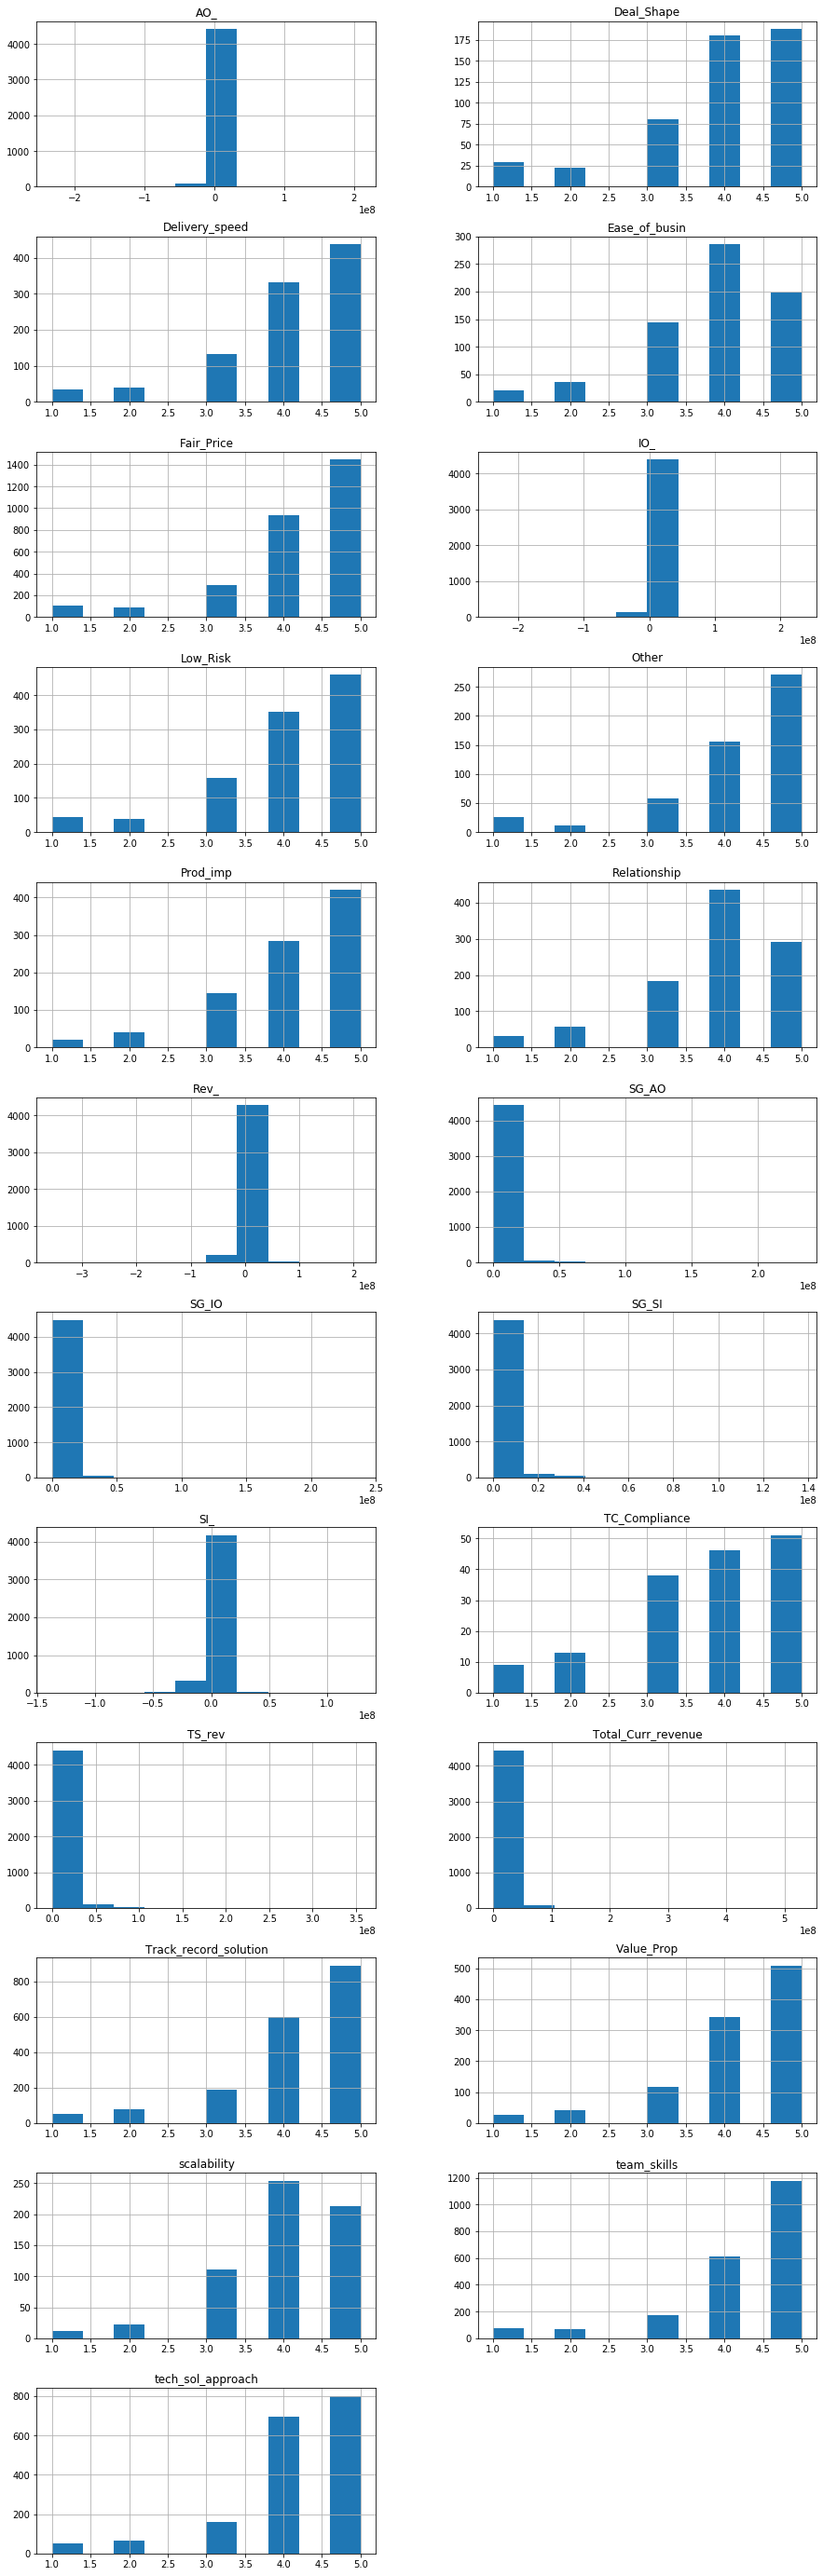

In [6]:
plt.figure(figsize = (10,10))
buyer_values.hist(stacked = False, figsize = (15,50), layout = (12,2))

In [7]:
buyer_values.head()

,opp_name,Market,MU,master_client,prim_industry,Fiscal,Stage,Rev_,AO_,SI_,...,Delivery_speed,Total_Curr_revenue,TS_rev,Deal_size,SG_AO,SG_SI,SG_IO,reason,Extension,Cloud
0,XYZ - GFS RPA development,North America,Northeast,PFIZER,PD Life Sciences,Q4-2019,Closed - Won,1153450,0,1153450,...,3.0,1153450,1153450,SMALL,0,1153450,0,junk,No,No
1,SOC Managed Services RFP,North America,Northeast,CAPRI HOLDINGS LIMITED,PD Retail,Q3-2018,Closed - Client withdrawn,0,0,0,...,NaN,4837000,4837000,SMALL,0,0,4837000,junk,No,No
2,GE MES Blueprint (Solihull),Europe,"UK, Ireland",TATA MOTORS GROUP,PD Mobility,Q4-2019,Closed - Lost,-616732,0,-616732,...,4.0,1178325,616732,SMALL,0,616732,0,junk,No,No
3,NEEDLE MSA - CR Bundle 3 - IAM Services,Europe,ASGR,LAFARGEHOLCIM,RS Nat Res,Q4-2018,Closed - Won,2983269,0,0,...,3.0,2983269,2983269,SMALL,0,0,2983269,junk,No,No
4,ABG HCM Oracle App Services,North America,South,CARNIVAL CORPORATION,PD Travel,Q4-2019,Closed - Lost,-3700389,-3700389,0,...,NaN,3700389,3700389,SMALL,3700389,0,0,junk,No,No


In [8]:
buyer_values["Stage"].unique()

array(['Closed - Won', 'Closed - Client withdrawn', 'Closed - Lost',
       'Closed - ACN withdrawn'], dtype=object)

In [9]:
buyer_values = buyer_values.replace({"Stage": {"Closed - Client withdrawn":"Withdraw", "Closed - Won":"Won", "Closed - ACN withdrawn":"Withdraw", "Closed - Lost":"Lost"}})

In [10]:
stage = pd.get_dummies(buyer_values["Stage"],drop_first=True)
stage

,Withdraw,Won
0,0,1
1,1,0
2,0,0
3,0,1
4,0,0
...,...,...
4542,0,1
4543,0,0
4544,0,0
4545,0,0


In [11]:
Market = pd.get_dummies(buyer_values["Market"], drop_first=True)
Market 

,Growth Markets,North America
0,0,1
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
4542,0,0
4543,0,1
4544,0,0
4545,0,1


In [12]:
Deal_size = pd.get_dummies(buyer_values["Deal_size"], drop_first=True)
Deal_size 

,MEDIUM,SMALL
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
4542,0,1
4543,0,1
4544,0,1
4545,1,0


In [13]:
Extension = pd.get_dummies(buyer_values["Extension"], drop_first=True)
Extension 

""
0
1
2
3
4
...
4542
4543
4544
4545


In [14]:
Cloud = pd.get_dummies(buyer_values["Cloud"], drop_first=True)
Cloud 

,Yes
0,0
1,0
2,0
3,0
4,0
...,...
4542,1
4543,1
4544,1
4545,1


In [15]:
buyer_values = pd.concat([buyer_values,stage], axis = 1)
buyer_values = pd.concat([buyer_values,Market], axis = 1)
buyer_values = pd.concat([buyer_values,Deal_size], axis = 1)
#buyer_values = pd.concat([buyer_values,Extension], axis = 1)
buyer_values = pd.concat([buyer_values,Cloud], axis = 1)

In [16]:
buyer_values = buyer_values.drop(["opp_name","master_client","Cust_relation", "Stage","reason","Market", "MU", "prim_industry", "Fiscal", "reason","Extension","Cloud"], axis = 1)

In [17]:
buyer_values.head()

,Rev_,AO_,SI_,IO_,Low_Risk,Other,Prod_imp,Fair_Price,Value_Prop,Deal_Shape,...,SG_AO,SG_SI,SG_IO,Withdraw,Won,Growth Markets,North America,MEDIUM,SMALL,Yes
0,1153450,0,1153450,0,3.0,NaN,3.0,3.0,5.0,4.0,...,0,1153450,0,0,1,0,1,0,1,0
1,0,0,0,0,5.0,NaN,NaN,5.0,5.0,NaN,...,0,0,4837000,1,0,0,1,0,1,0
2,-616732,0,-616732,0,5.0,NaN,NaN,4.0,3.0,1.0,...,0,616732,0,0,0,0,0,0,1,0
3,2983269,0,0,2983269,4.0,NaN,5.0,5.0,NaN,5.0,...,0,0,2983269,0,1,0,0,0,1,0
4,-3700389,-3700389,0,0,NaN,NaN,3.0,NaN,5.0,NaN,...,3700389,0,0,0,0,0,1,0,1,0


In [18]:
buyer_values=buyer_values.fillna(0)

In [19]:
for i in buyer_values.columns: 
    print( i , ":" , buyer_values[i].nunique())

Rev_ : 2994
AO_ : 981
SI_ : 2164
IO_ : 465
Low_Risk : 6
Other : 6
Prod_imp : 6
Fair_Price : 6
Value_Prop : 6
Deal_Shape : 6
Relationship : 6
Ease_of_busin : 6
Track_record_solution : 6
team_skills : 6
tech_sol_approach : 6
scalability : 6
TC_Compliance : 6
Delivery_speed : 6
Total_Curr_revenue : 4259
TS_rev : 4279
Deal_size : 3
SG_AO : 1385
SG_SI : 3106
SG_IO : 686
Withdraw : 2
Won : 2
Growth Markets : 2
North America : 2
MEDIUM : 2
SMALL : 2
Yes : 2


In [20]:
scaler = MinMaxScaler()
transformed_columns = scaler.fit_transform(buyer_values[["Rev_","AO_","SI_","IO_","Total_Curr_revenue", "TS_rev", "SG_AO", "SG_SI", "SG_IO", "Low_Risk","Other","Prod_imp","Fair_Price","Value_Prop","Deal_Shape","Relationship","Ease_of_busin","Track_record_solution","team_skills","tech_sol_approach","scalability","TC_Compliance","Delivery_speed"]]) 
transformed_df = pd.DataFrame(transformed_columns, columns = ["Rev_","AO_","SI_","IO_","Total_Curr_revenue", "TS_rev", "SG_AO", "SG_SI", "SG_IO", "Low_Risk","Other","Prod_imp","Fair_Price","Value_Prop","Deal_Shape","Relationship","Ease_of_busin","Track_record_solution","team_skills","tech_sol_approach","scalability","TC_Compliance","Delivery_speed"])

In [21]:
buyer_values = buyer_values.drop(["Rev_","AO_","SI_","IO_","Total_Curr_revenue", "TS_rev", "SG_AO", "SG_SI", "SG_IO", "Low_Risk","Other","Prod_imp","Fair_Price","Value_Prop","Deal_Shape","Relationship","Ease_of_busin","Track_record_solution","team_skills","tech_sol_approach","scalability","TC_Compliance","Delivery_speed"], axis = 1)
buyer_values = pd.concat([buyer_values,transformed_df], axis = 1)

In [22]:
buyer_values_1 = buyer_values[["Low_Risk","Other","Prod_imp","Fair_Price","Value_Prop","Deal_Shape","Relationship","Ease_of_busin","Track_record_solution","team_skills","tech_sol_approach","scalability","TC_Compliance","Delivery_speed","Won","Withdraw","Rev_","AO_","SI_","IO_"]]

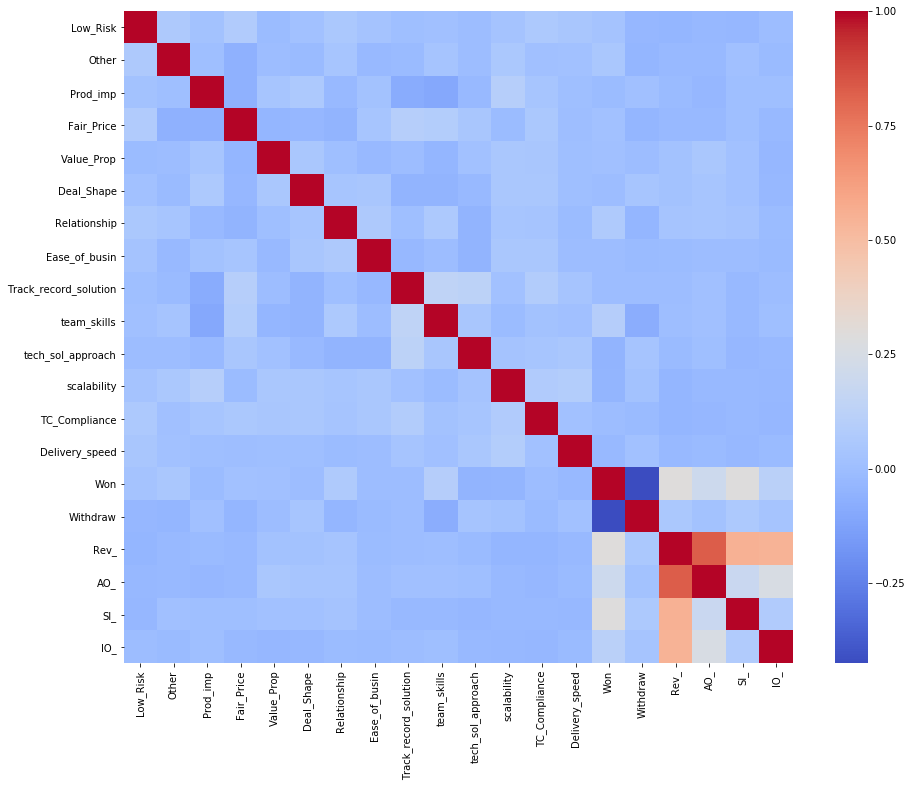

In [23]:
buyer_values_large = buyer_values[buyer_values["Deal_size"] == "LARGE"]
buyer_values_small = buyer_values[buyer_values["Deal_size"] == "SMALL"]
buyer_values_med = buyer_values[buyer_values["Deal_size"] == "MEDIUM"]
buyer_values = buyer_values.drop(["Deal_size"],axis = 1)
corr_matrix = buyer_values_1.corr()
plt.figure(figsize = (15,12))
sns.heatmap(corr_matrix, cmap = "coolwarm")

In [24]:
corr_matrix

,Low_Risk,Other,Prod_imp,Fair_Price,Value_Prop,Deal_Shape,Relationship,Ease_of_busin,Track_record_solution,team_skills,tech_sol_approach,scalability,TC_Compliance,Delivery_speed,Won,Withdraw,Rev_,AO_,SI_,IO_
Low_Risk,1.000000,0.070011,0.023430,0.076797,-0.010802,0.017902,0.058315,0.030764,0.006538,0.013109,-0.006833,0.025545,0.061693,0.043310,0.026056,-0.035626,-0.039183,-0.028596,-0.031286,-0.005491
Other,0.070011,1.000000,0.005358,-0.061264,-0.005661,-0.014639,0.042187,-0.020126,-0.018159,0.032986,-0.007370,0.056229,0.010226,0.019441,0.049501,-0.036974,-0.023906,-0.020791,0.011969,-0.016602
Prod_imp,0.023430,0.005358,1.000000,-0.058941,0.041070,0.062460,-0.020489,0.025464,-0.080517,-0.102004,-0.023426,0.099202,0.039231,0.006675,-0.012792,0.010894,-0.016346,-0.034721,0.007254,0.008750
Fair_Price,0.076797,-0.061264,-0.058941,1.000000,-0.037274,-0.032445,-0.048871,0.039643,0.100418,0.088557,0.043523,-0.013047,0.058284,0.001686,0.017577,-0.038973,-0.019928,-0.022042,0.004228,-0.019845
Value_Prop,-0.010802,-0.005661,0.041070,-0.037274,1.000000,0.053179,0.005987,-0.021660,-0.005158,-0.040237,0.018161,0.049354,0.043693,0.007063,0.012298,-0.007700,0.023618,0.049124,0.017064,-0.035444
Deal_Shape,0.017902,-0.014639,0.062460,-0.032445,0.053179,1.000000,0.041520,0.043168,-0.051085,-0.049361,-0.019523,0.051020,0.048068,0.003649,-0.005047,0.038489,0.023771,0.041415,0.017294,-0.026074
Relationship,0.058315,0.042187,-0.020489,-0.048871,0.005987,0.041520,1.000000,0.066454,0.004316,0.060763,-0.048234,0.040695,0.032590,-0.010265,0.071917,-0.037070,0.033184,0.037858,0.030800,-0.009979
Ease_of_busin,0.030764,-0.020126,0.025464,0.039643,-0.021660,0.043168,0.066454,1.000000,-0.026347,-0.004717,-0.049266,0.048817,0.047972,-0.003189,-0.007515,-0.014690,-0.010749,-0.006022,-0.003176,-0.017494
Track_record_solution,0.006538,-0.018159,-0.080517,0.100418,-0.005158,-0.051085,0.004316,-0.026347,1.000000,0.137538,0.125891,0.018403,0.081381,0.034814,-0.002427,-0.004970,-0.007831,0.011623,-0.022788,-0.004267
team_skills,0.013109,0.032986,-0.102004,0.088557,-0.040237,-0.049361,0.060763,-0.004717,0.137538,1.000000,0.045677,-0.009250,0.022213,0.010175,0.094198,-0.077152,0.001406,0.009329,-0.024441,0.005184


<BarContainer object of 14 artists>

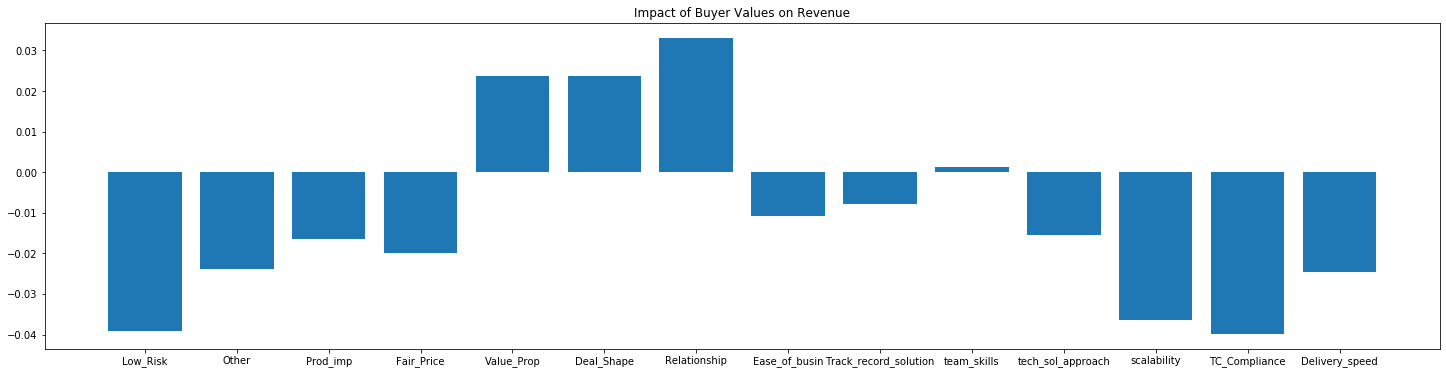

In [25]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on Revenue")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["Rev_"])[:14])

<BarContainer object of 14 artists>

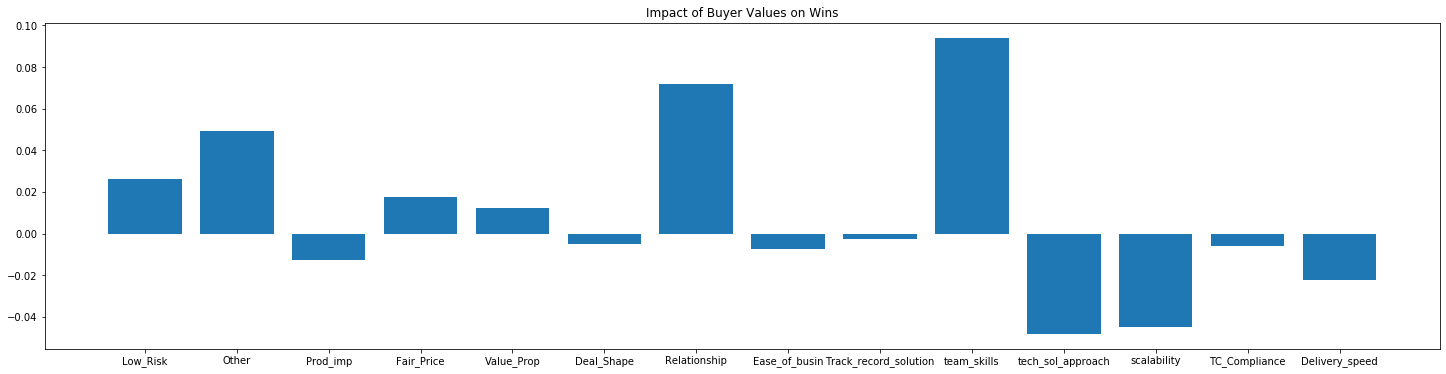

In [26]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on Wins")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["Won"])[:14])

<BarContainer object of 14 artists>

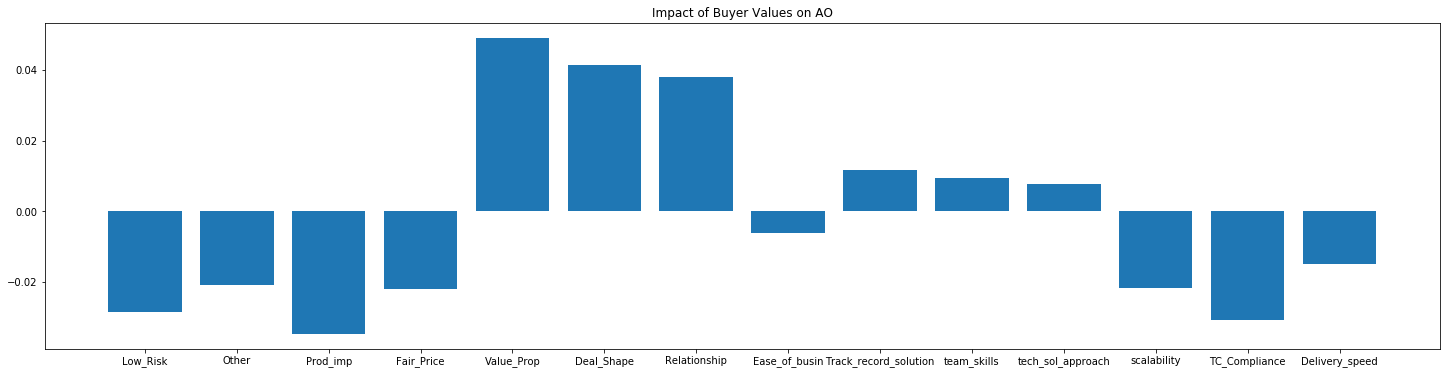

In [27]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on AO")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["AO_"])[:14])

<BarContainer object of 14 artists>

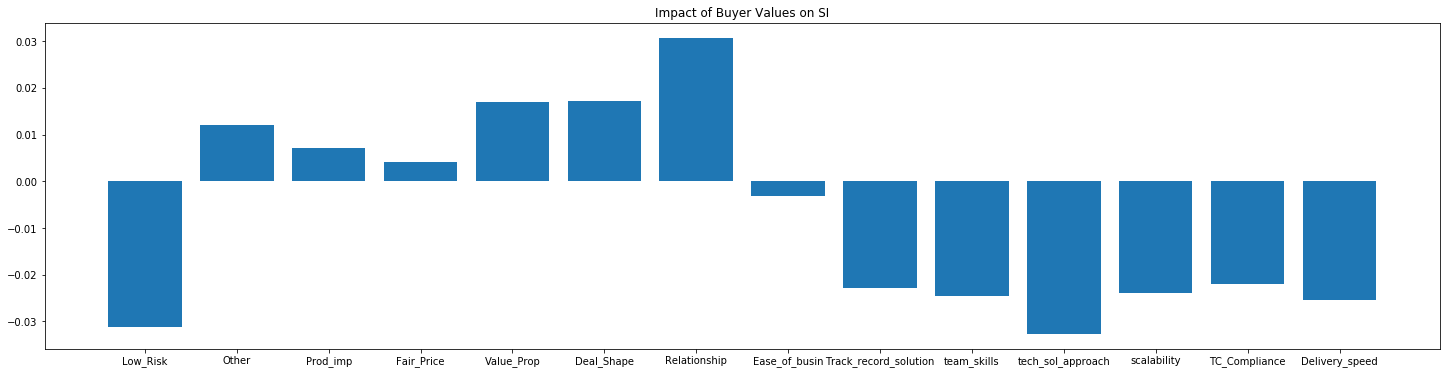

In [28]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on SI")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["SI_"])[:14])

<BarContainer object of 14 artists>

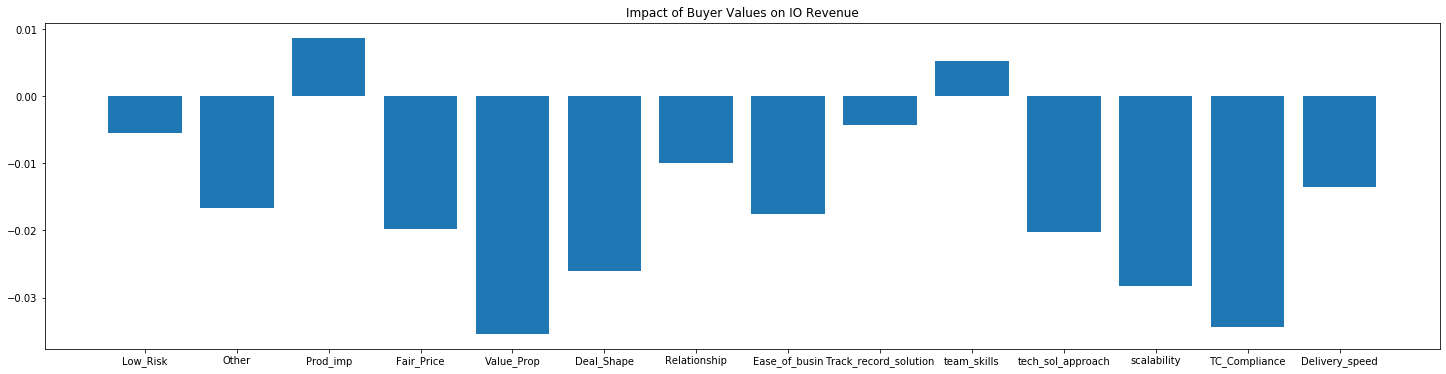

In [29]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on IO Revenue")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["IO_"])[:14])

<BarContainer object of 14 artists>

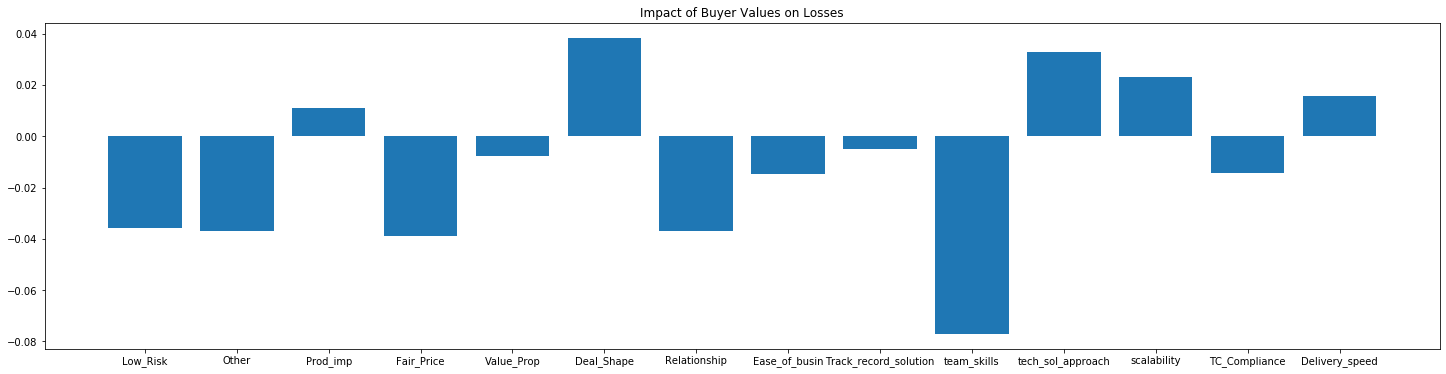

In [30]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on Losses")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["Withdraw"])[:14])

In [31]:
y = buyer_values.pop("Won")

In [32]:
y.nunique()

2

              precision    recall  f1-score   support

           0       0.76      0.62      0.68       678
           1       0.28      0.44      0.34       232

    accuracy                           0.57       910
   macro avg       0.52      0.53      0.51       910
weighted avg       0.64      0.57      0.59       910

[[418 260]
 [131 101]]


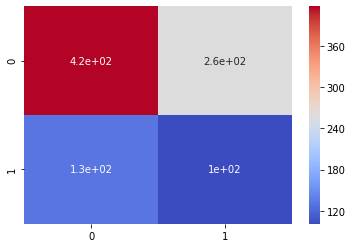

In [33]:
x = buyer_values
x = x.drop(["Withdraw","Rev_","AO_","SI_","IO_"],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
svc_ = SVC(class_weight = "balanced",C=3)
svc_.fit(x_train, y_train)
y_pred_svc = svc_.predict(x_test)
#knn_classifier = KNeighborsClassifier(n_neighbors = 8, metric = "euclidean", weights = "uniform")
#knn_classifier.fit(x_train, y_train)
#y_pred_knn = knn_classifier.predict(x_test)
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
cm = confusion_matrix(y_test, y_pred_svc, labels = [0, 1])
plt.figure (figsize = (6,4))
sns.heatmap (cm, annot = True, cmap = "coolwarm")

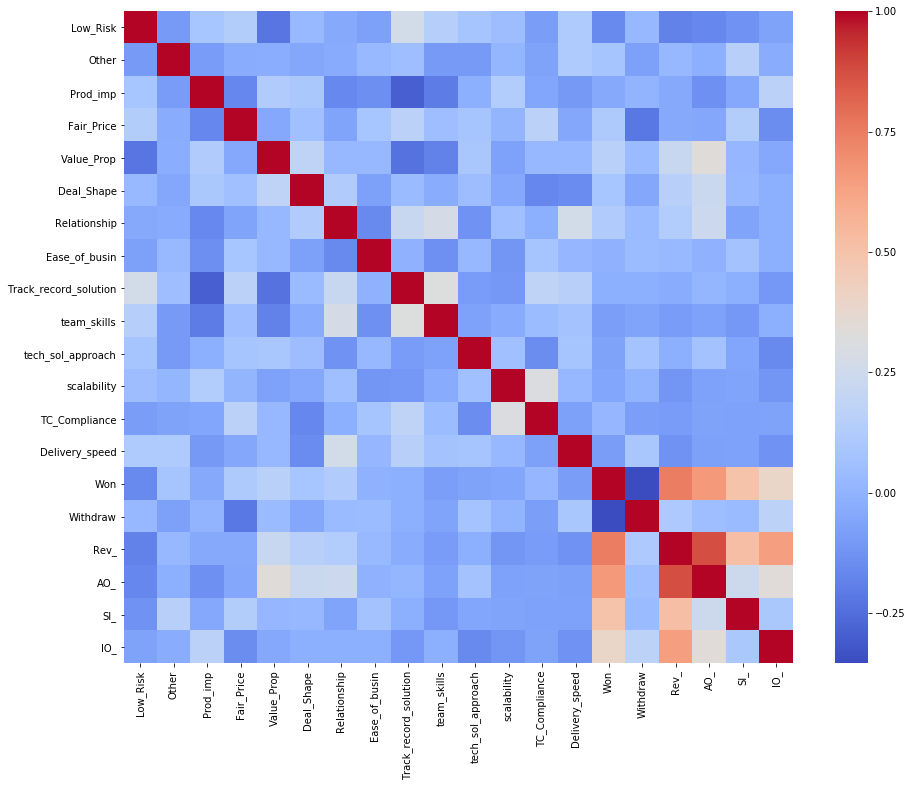

In [34]:
buyer_values_large = buyer_values_large.drop(["Deal_size"],axis = 1)
buyer_values_1 = buyer_values_large[["Low_Risk","Other","Prod_imp","Fair_Price","Value_Prop","Deal_Shape","Relationship","Ease_of_busin","Track_record_solution","team_skills","tech_sol_approach","scalability","TC_Compliance","Delivery_speed","Won","Withdraw","Rev_","AO_","SI_","IO_"]]
corr_matrix = buyer_values_1.corr()
plt.figure(figsize = (15,12))
sns.heatmap(corr_matrix, cmap = "coolwarm")

In [35]:
corr_matrix

,Low_Risk,Other,Prod_imp,Fair_Price,Value_Prop,Deal_Shape,Relationship,Ease_of_busin,Track_record_solution,team_skills,tech_sol_approach,scalability,TC_Compliance,Delivery_speed,Won,Withdraw,Rev_,AO_,SI_,IO_
Low_Risk,1.000000,-0.096664,8.875803e-02,0.136051,-0.227235,0.031372,-0.042254,-0.076806,0.264712,0.146658,0.082295,4.445850e-02,-0.085100,0.120160,-0.157280,2.198423e-02,-0.181500,-0.165167,-0.127433,-0.067495
Other,-0.096664,1.000000,-9.059930e-02,-0.030635,-0.025911,-0.048132,-0.035198,0.030441,0.049798,-0.095804,-0.098099,1.581668e-02,-0.063936,0.117649,0.079373,-7.861799e-02,0.024480,-0.016801,0.151688,-0.026795
Prod_imp,0.088758,-0.090599,1.000000e+00,-0.168960,0.125050,0.101184,-0.161982,-0.141678,-0.294672,-0.201603,-0.021151,1.303261e-01,-0.057818,-0.101765,-0.037232,-9.311645e-17,-0.040703,-0.134089,-0.042812,0.165668
Fair_Price,0.136051,-0.030635,-1.689602e-01,1.000000,-0.045769,0.060722,-0.058953,0.087244,0.168504,0.048257,0.082435,9.638651e-03,0.164140,-0.052205,0.115054,-2.139964e-01,-0.039858,-0.050553,0.135165,-0.145026
Value_Prop,-0.227235,-0.025911,1.250495e-01,-0.045769,1.000000,0.182915,0.024880,0.021226,-0.233355,-0.180612,0.090729,-7.134289e-02,0.025311,0.023445,0.158248,3.310836e-02,0.218822,0.338168,0.017930,-0.045761
Deal_Shape,0.031372,-0.048132,1.011845e-01,0.060722,0.182915,1.000000,0.126059,-0.078256,0.035076,-0.029655,0.046556,-4.420015e-02,-0.167267,-0.151111,0.088408,-5.012419e-02,0.151579,0.229161,0.023674,-0.016827
Relationship,-0.042254,-0.035198,-1.619825e-01,-0.058953,0.024880,0.126059,1.000000,-0.158538,0.217022,0.278018,-0.124928,5.355742e-02,-0.017954,0.265623,0.124925,3.458649e-02,0.129268,0.235811,-0.058385,-0.010817
Ease_of_busin,-0.076806,0.030441,-1.416776e-01,0.087244,0.021226,-0.078256,-0.158538,1.000000,-0.003870,-0.132315,0.024376,-1.164087e-01,0.082301,0.016091,-0.001059,4.124060e-02,0.026937,-0.009822,0.072809,-0.016697
Track_record_solution,0.264712,0.049798,-2.946723e-01,0.168504,-0.233355,0.035076,0.217022,-0.003870,1.000000,0.318582,-0.092442,-1.091554e-01,0.182507,0.153058,-0.016489,-1.876797e-02,-0.031572,0.012400,-0.019060,-0.108619
team_skills,0.146658,-0.095804,-2.016027e-01,0.048257,-0.180612,-0.029655,0.278018,-0.132315,0.318582,1.000000,-0.073152,-3.447618e-02,0.037889,0.072850,-0.080563,-6.029559e-02,-0.092785,-0.069348,-0.110079,-0.015831


<BarContainer object of 14 artists>

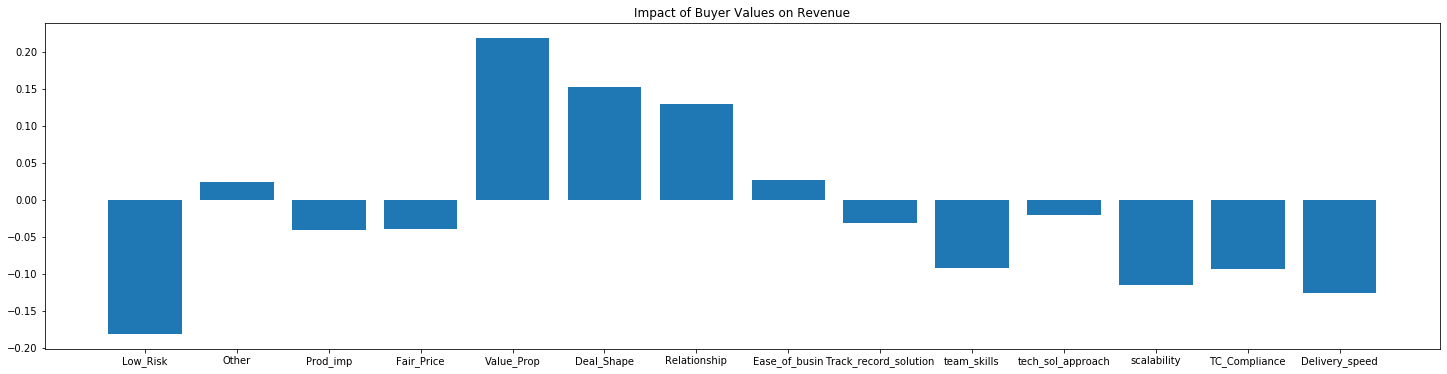

In [36]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on Revenue")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["Rev_"])[:14])

<BarContainer object of 14 artists>

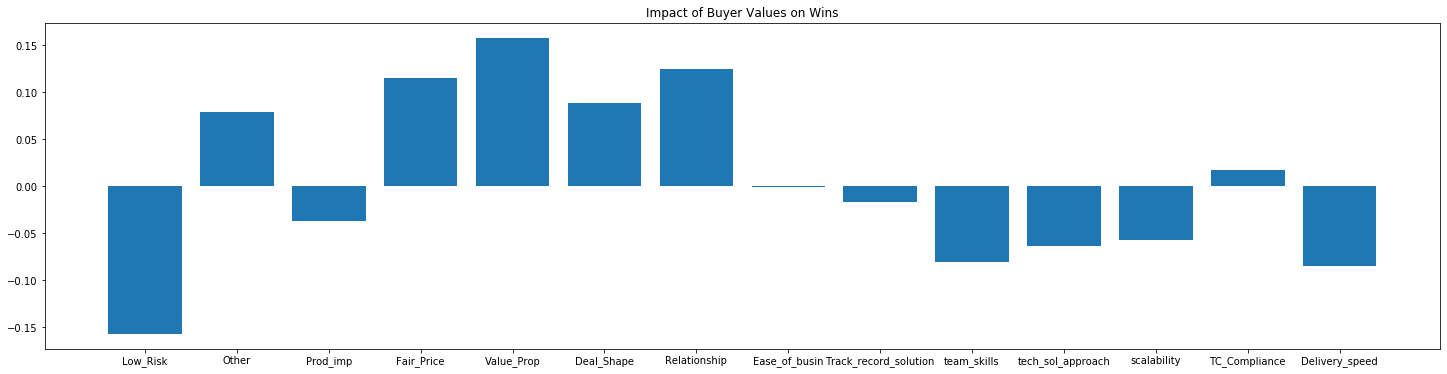

In [37]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on Wins")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["Won"])[:14])

<BarContainer object of 14 artists>

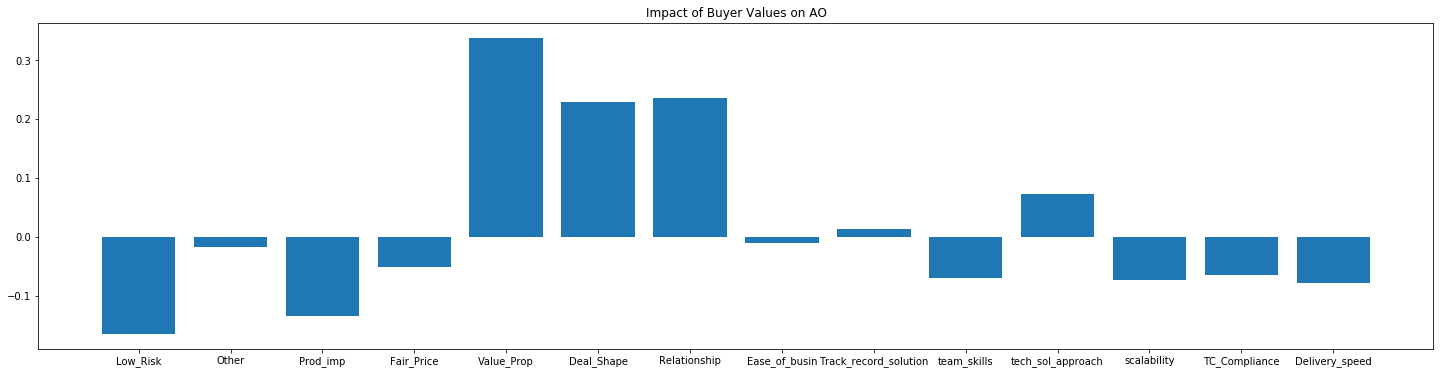

In [38]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on AO")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["AO_"])[:14])

<BarContainer object of 14 artists>

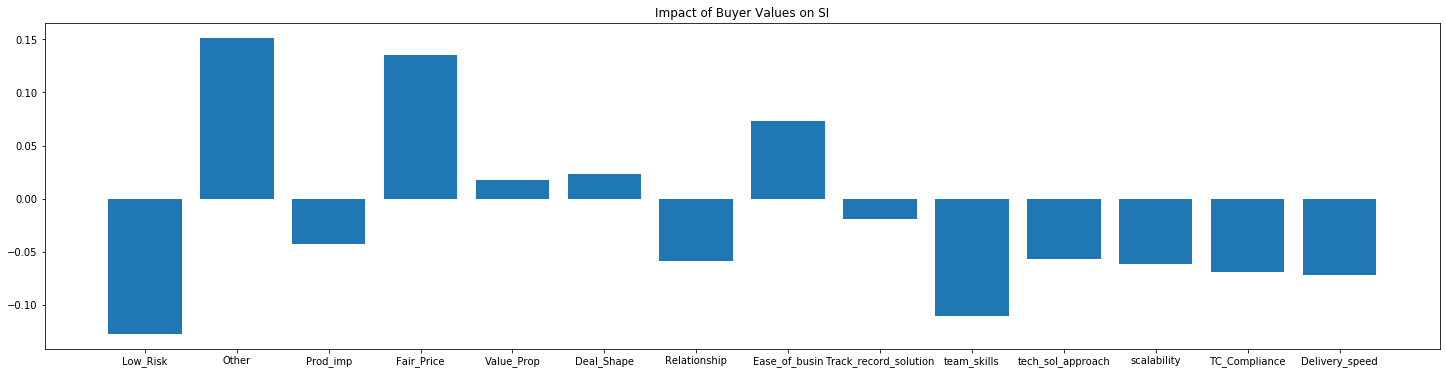

In [39]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on SI")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["SI_"])[:14])

<BarContainer object of 14 artists>

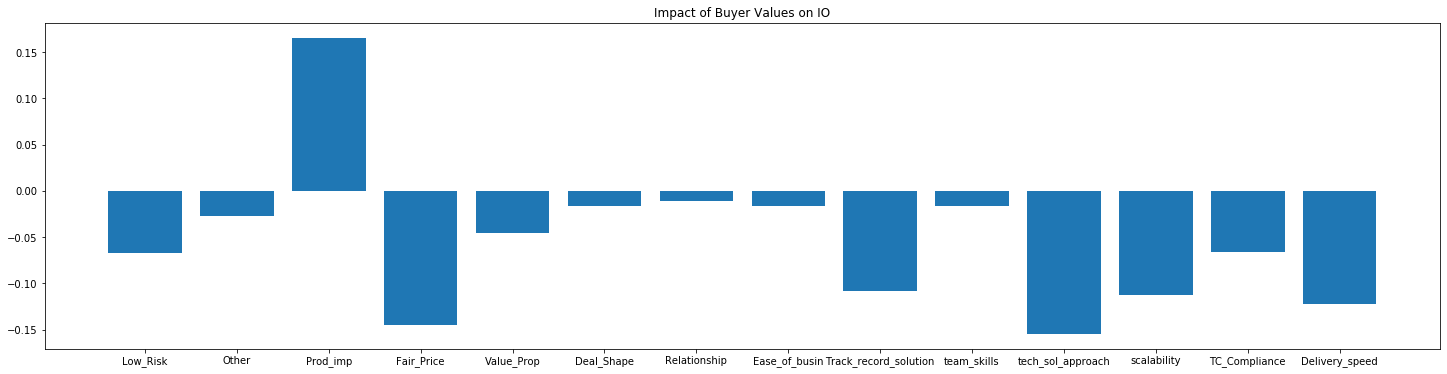

In [40]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on IO")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["IO_"])[:14])

<BarContainer object of 14 artists>

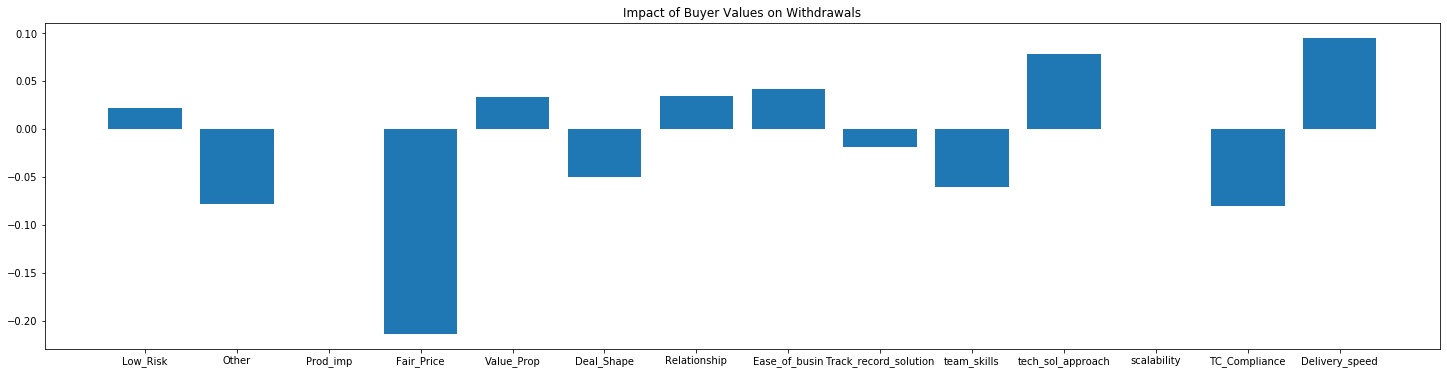

In [41]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on Withdrawals")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["Withdraw"])[:14])

In [42]:
y = buyer_values_large.pop("Won")

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.29      0.67      0.40         3

    accuracy                           0.65        17
   macro avg       0.59      0.65      0.57        17
weighted avg       0.79      0.65      0.69        17

[[9 5]
 [1 2]]


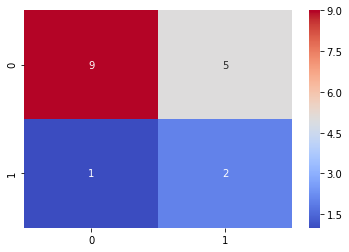

In [43]:
x = buyer_values_large
x = x.drop(["Withdraw","Rev_","AO_","SI_","IO_"],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
#knn_classifier = KNeighborsClassifier(n_neighbors = 8, metric = "euclidean", weights = "uniform")
#knn_classifier.fit(x_train, y_train)
#y_pred_knn = knn_classifier.predict(x_test)
svc_ = SVC(class_weight = "balanced",C=3)
svc_.fit(x_train, y_train)
y_pred_svc = svc_.predict(x_test)
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
cm = confusion_matrix(y_test, y_pred_svc, labels = [0, 1])
plt.figure (figsize = (6,4))
sns.heatmap (cm, annot = True, cmap = "coolwarm")

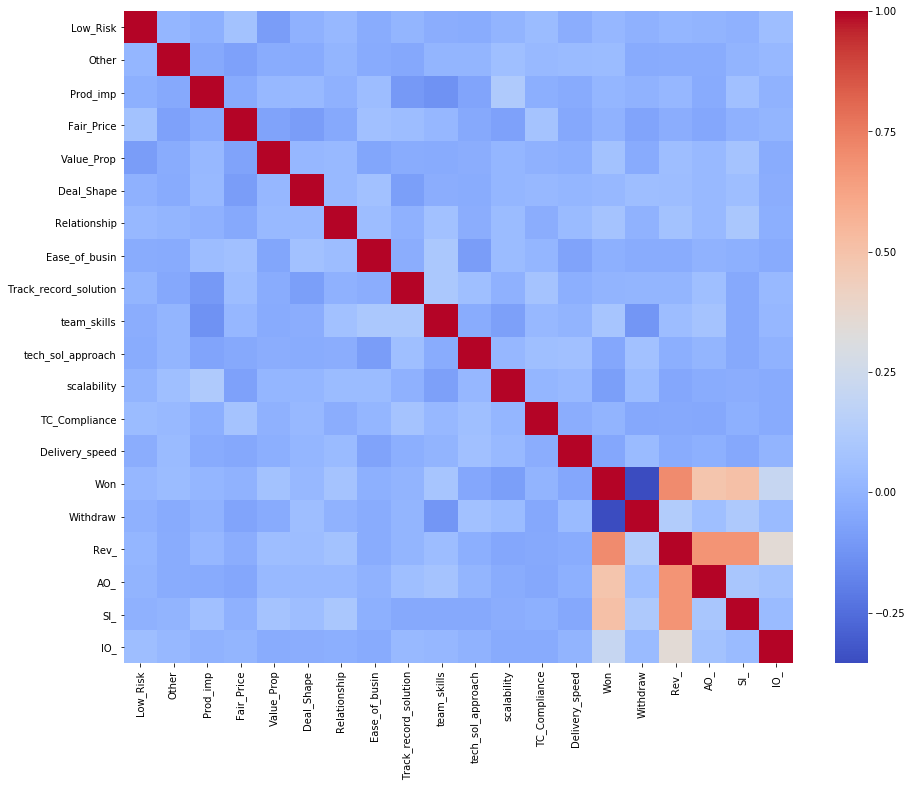

In [44]:
buyer_values_med = buyer_values_med.drop(["Deal_size"],axis = 1)
buyer_values_1 = buyer_values_med[["Low_Risk","Other","Prod_imp","Fair_Price","Value_Prop","Deal_Shape","Relationship","Ease_of_busin","Track_record_solution","team_skills","tech_sol_approach","scalability","TC_Compliance","Delivery_speed","Won","Withdraw","Rev_","AO_","SI_","IO_"]]
corr_matrix = buyer_values_1.corr()
plt.figure(figsize = (15,12))
sns.heatmap(corr_matrix, cmap = "coolwarm")

In [45]:
corr_matrix

,Low_Risk,Other,Prod_imp,Fair_Price,Value_Prop,Deal_Shape,Relationship,Ease_of_busin,Track_record_solution,team_skills,tech_sol_approach,scalability,TC_Compliance,Delivery_speed,Won,Withdraw,Rev_,AO_,SI_,IO_
Low_Risk,1.000000,0.015133,-0.014263,0.068996,-0.085847,-0.011059,0.022810,-0.031843,0.006123,-0.023342,-0.031714,0.001465,0.038914,-0.022212,0.020240,-0.009140,0.014509,0.003771,-0.006509,0.050994
Other,0.015133,1.000000,-0.039211,-0.074584,-0.031029,-0.036979,0.005551,-0.037647,-0.043569,0.008281,0.009186,0.055596,0.025999,0.034814,0.037731,-0.033481,-0.027691,-0.029777,0.001660,0.025717
Prod_imp,-0.014263,-0.039211,1.000000,-0.036372,0.021161,0.030762,-0.006200,0.042035,-0.103533,-0.130789,-0.059101,0.118152,-0.019403,-0.033463,0.011508,-0.005466,0.016170,-0.033035,0.057875,-0.001790
Fair_Price,0.068996,-0.074584,-0.036372,1.000000,-0.064305,-0.090110,-0.041973,0.062803,0.044270,0.020523,-0.041368,-0.074016,0.075453,-0.045198,-0.000872,-0.063602,-0.026971,-0.051338,-0.006727,0.009064
Value_Prop,-0.085847,-0.031029,0.021161,-0.064305,1.000000,0.019551,0.026288,-0.058791,-0.030418,-0.033789,-0.023467,0.010954,-0.006790,-0.017816,0.069880,-0.032450,0.050596,0.027586,0.075090,-0.027973
Deal_Shape,-0.011059,-0.036979,0.030762,-0.090110,0.019551,1.000000,0.026743,0.066690,-0.080988,-0.023156,-0.027524,0.012371,0.024672,0.011348,0.022647,0.047200,0.042765,0.030506,0.048786,-0.022402
Relationship,0.022810,0.005551,-0.006200,-0.041973,0.026288,0.026743,1.000000,0.044571,-0.010748,0.065106,-0.025814,0.037417,-0.025150,0.032517,0.075984,-0.004816,0.071010,0.027065,0.098209,-0.017415
Ease_of_busin,-0.031843,-0.037647,0.042035,0.062803,-0.058791,0.066690,0.044571,1.000000,-0.023922,0.100875,-0.088057,0.036982,0.014767,-0.064486,-0.011503,-0.027738,-0.031133,-0.003827,-0.016266,-0.032795
Track_record_solution,0.006123,-0.043569,-0.103533,0.044270,-0.030418,-0.080988,-0.010748,-0.023922,1.000000,0.104804,0.053229,-0.009055,0.075983,-0.020983,0.003053,0.007975,0.009727,0.057226,-0.039674,0.030533
team_skills,-0.023342,0.008281,-0.130789,0.020523,-0.033789,-0.023156,0.065106,0.100875,0.104804,1.000000,-0.029520,-0.077045,0.021481,0.000881,0.086781,-0.116940,0.043211,0.074194,-0.039720,0.016370


<BarContainer object of 14 artists>

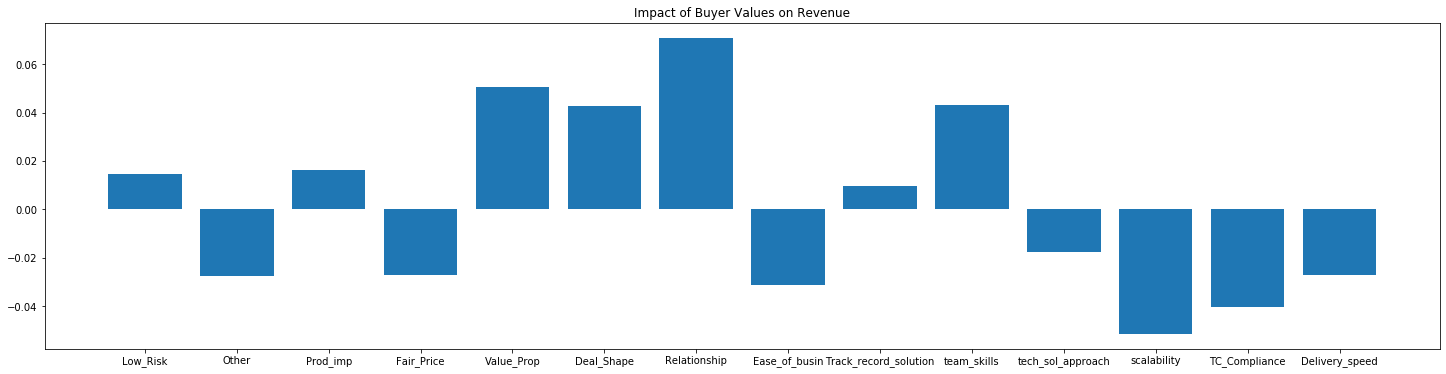

In [46]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on Revenue")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["Rev_"])[:14])

<BarContainer object of 14 artists>

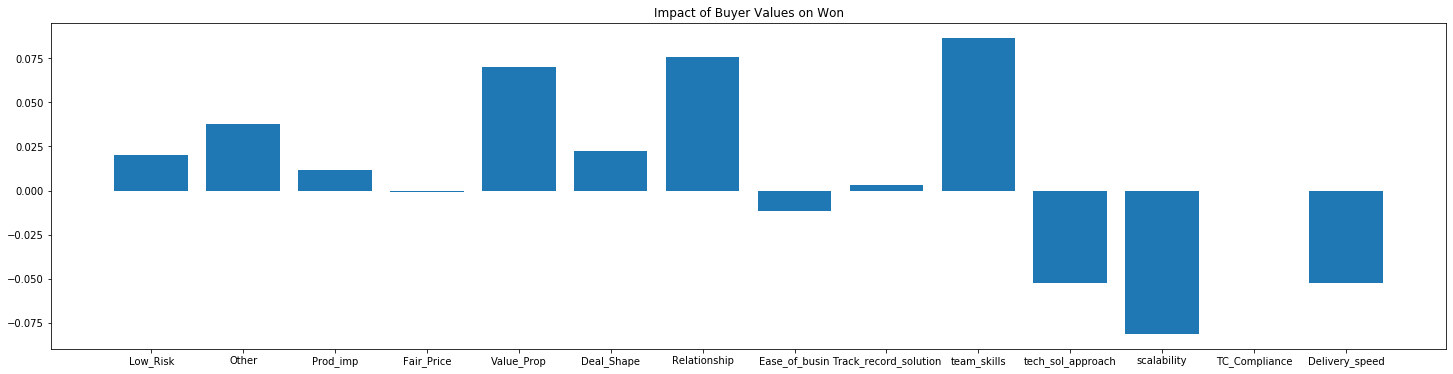

In [47]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on Won")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["Won"])[:14])

<BarContainer object of 14 artists>

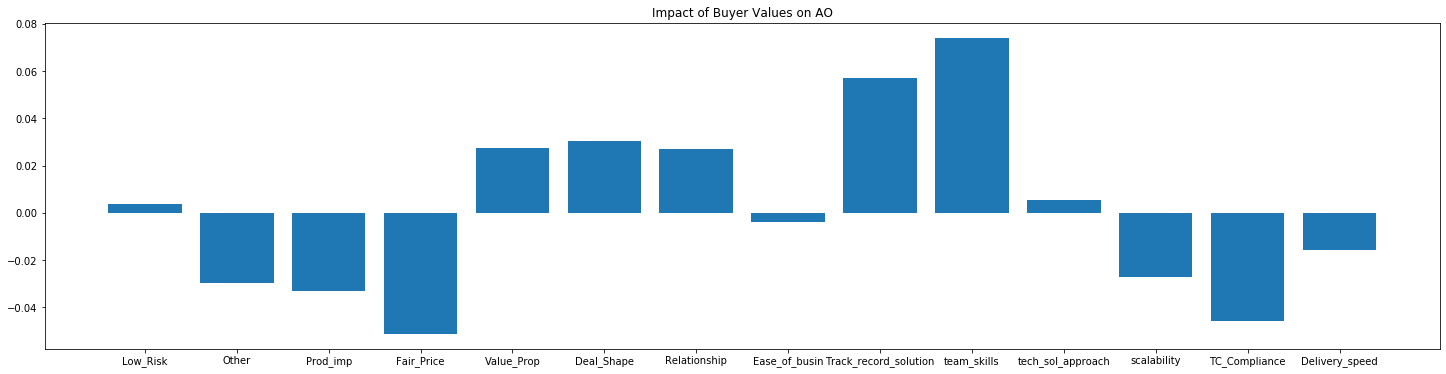

In [48]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on AO")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["AO_"])[:14])

<BarContainer object of 14 artists>

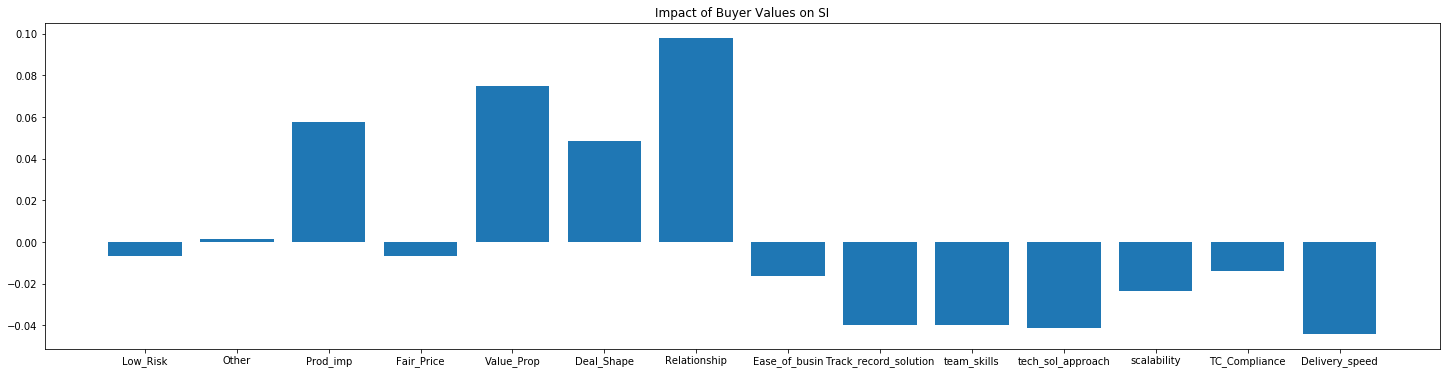

In [49]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on SI")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["SI_"])[:14])

<BarContainer object of 14 artists>

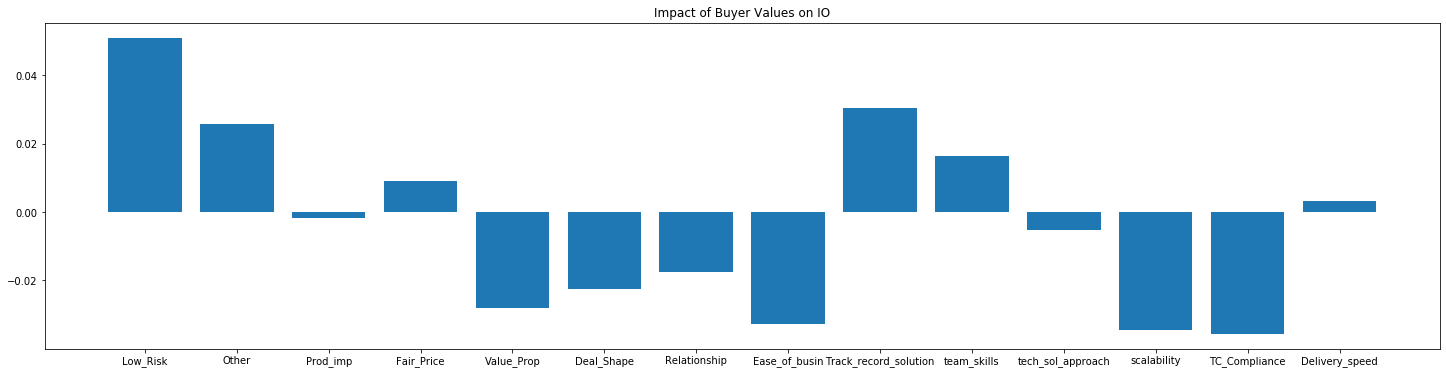

In [50]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on IO")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["IO_"])[:14])

<BarContainer object of 14 artists>

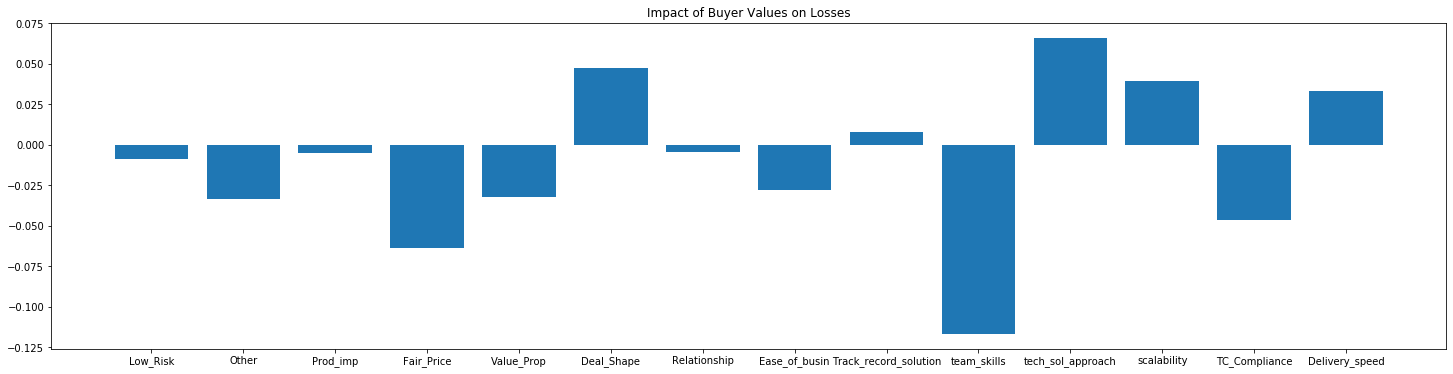

In [51]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on Losses")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["Withdraw"])[:14])

In [52]:
y = buyer_values_med.pop("Won")

              precision    recall  f1-score   support

           0       0.80      0.62      0.70       170
           1       0.36      0.58      0.45        64

    accuracy                           0.61       234
   macro avg       0.58      0.60      0.57       234
weighted avg       0.68      0.61      0.63       234

[[105  65]
 [ 27  37]]


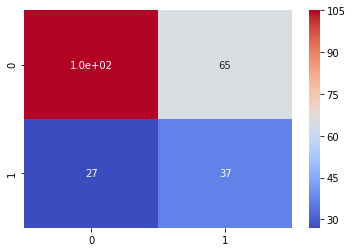

In [53]:
x = buyer_values_med
x = x.drop(["Withdraw","Rev_","AO_","SI_","IO_"],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
#knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean", weights = "uniform")
#knn_classifier.fit(x_train, y_train)
#y_pred_knn = knn_classifier.predict(x_test)
svc_ = SVC(class_weight = "balanced",C=0.3)
svc_.fit(x_train, y_train)
y_pred_svc = svc_.predict(x_test)
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
cm = confusion_matrix(y_test, y_pred_svc, labels = [0, 1])
plt.figure (figsize = (6,4))
sns.heatmap (cm, annot = True, cmap = "coolwarm")

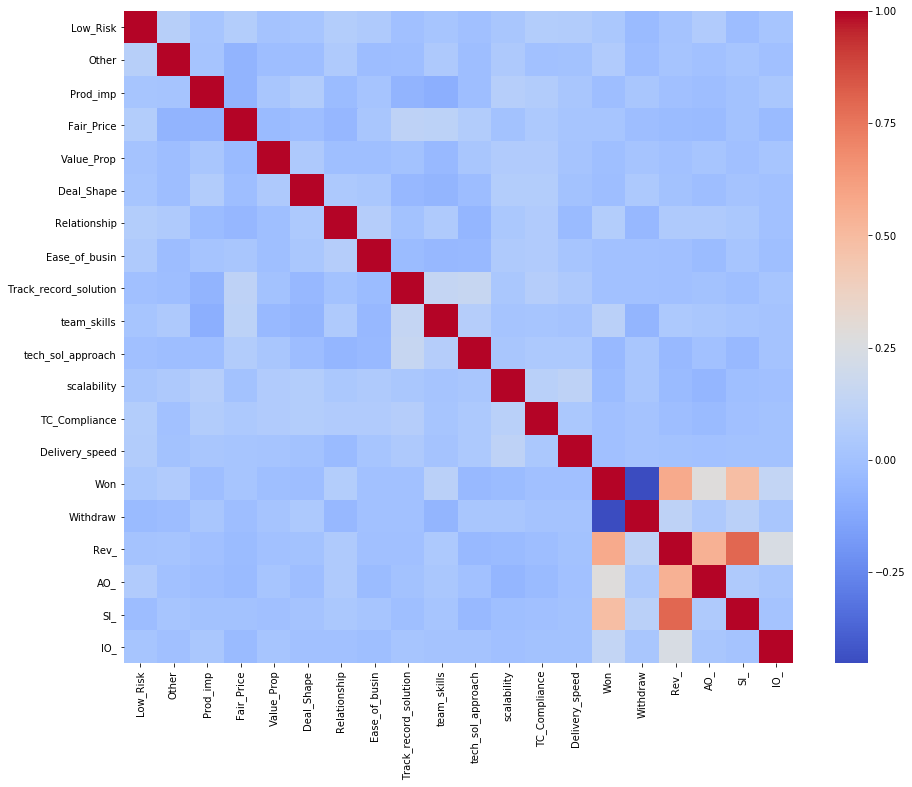

In [54]:
buyer_values_small = buyer_values_small.drop(["Deal_size"],axis = 1)
buyer_values_1 = buyer_values_small[["Low_Risk","Other","Prod_imp","Fair_Price","Value_Prop","Deal_Shape","Relationship","Ease_of_busin","Track_record_solution","team_skills","tech_sol_approach","scalability","TC_Compliance","Delivery_speed","Won","Withdraw","Rev_","AO_","SI_","IO_"]]
corr_matrix = buyer_values_1.corr()
plt.figure(figsize = (15,12))
sns.heatmap(corr_matrix, cmap = "coolwarm")

In [55]:
corr_matrix

,Low_Risk,Other,Prod_imp,Fair_Price,Value_Prop,Deal_Shape,Relationship,Ease_of_busin,Track_record_solution,team_skills,tech_sol_approach,scalability,TC_Compliance,Delivery_speed,Won,Withdraw,Rev_,AO_,SI_,IO_
Low_Risk,1.000000,0.085682,0.021498,0.070473,0.011097,0.018471,0.071705,0.055218,-0.009227,0.020990,-0.008059,0.027131,0.073238,0.065202,0.037483,-0.036446,0.007429,0.061151,-0.022729,0.017893
Other,0.085682,1.000000,0.012549,-0.069407,-0.020374,-0.017185,0.057020,-0.024193,-0.018905,0.047070,-0.021613,0.048470,-0.005002,0.003827,0.058221,-0.024212,0.013190,-0.004981,0.022805,-0.008813
Prod_imp,0.021498,0.012549,1.000000,-0.073177,0.027300,0.065522,-0.027983,0.015543,-0.071912,-0.091549,-0.017138,0.081197,0.066377,0.023619,-0.018977,0.028409,-0.005857,-0.018322,0.004014,0.034148
Fair_Price,0.070473,-0.069407,-0.073177,1.000000,-0.037466,-0.019388,-0.054664,0.025152,0.114777,0.111285,0.068238,0.005363,0.043486,0.017789,0.022872,-0.021621,-0.028066,-0.037519,0.001078,-0.034702
Value_Prop,0.011097,-0.020374,0.027300,-0.037466,1.000000,0.047993,-0.011209,-0.016200,0.004551,-0.042646,0.023934,0.062371,0.060052,0.012980,-0.012643,0.014331,-0.003947,0.018116,-0.009670,0.020747
Deal_Shape,0.018471,-0.017185,0.065522,-0.019388,0.047993,1.000000,0.041382,0.034102,-0.047208,-0.062082,-0.023273,0.069161,0.068677,0.004832,-0.018261,0.045328,0.000506,-0.016855,0.011749,-0.004775
Relationship,0.071705,0.057020,-0.027983,-0.054664,-0.011209,0.041382,1.000000,0.079188,0.001271,0.051842,-0.058722,0.037921,0.059842,-0.036437,0.070401,-0.045948,0.056860,0.056481,0.037217,-0.001861
Ease_of_busin,0.055218,-0.024193,0.015543,0.025152,-0.016200,0.034102,0.079188,1.000000,-0.032029,-0.046526,-0.040657,0.054001,0.059692,0.019867,-0.004405,-0.004979,-0.006503,-0.028720,0.018204,-0.011877
Track_record_solution,-0.009227,-0.018905,-0.071912,0.114777,0.004551,-0.047208,0.001271,-0.032029,1.000000,0.143534,0.155585,0.029478,0.076936,0.050878,-0.002700,-0.004029,-0.005853,0.005330,-0.013425,0.018437
team_skills,0.020990,0.047070,-0.091549,0.111285,-0.042646,-0.062082,0.051842,-0.046526,0.143534,1.000000,0.074543,0.017127,0.021142,0.011241,0.101931,-0.062091,0.041493,0.033181,0.017778,0.010911


<BarContainer object of 14 artists>

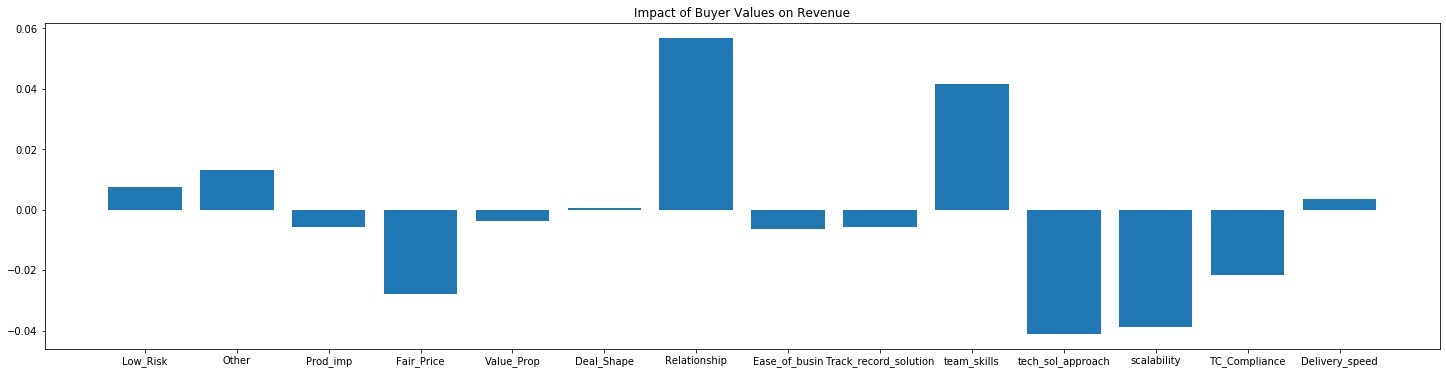

In [56]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on Revenue")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["Rev_"])[:14])

<BarContainer object of 14 artists>

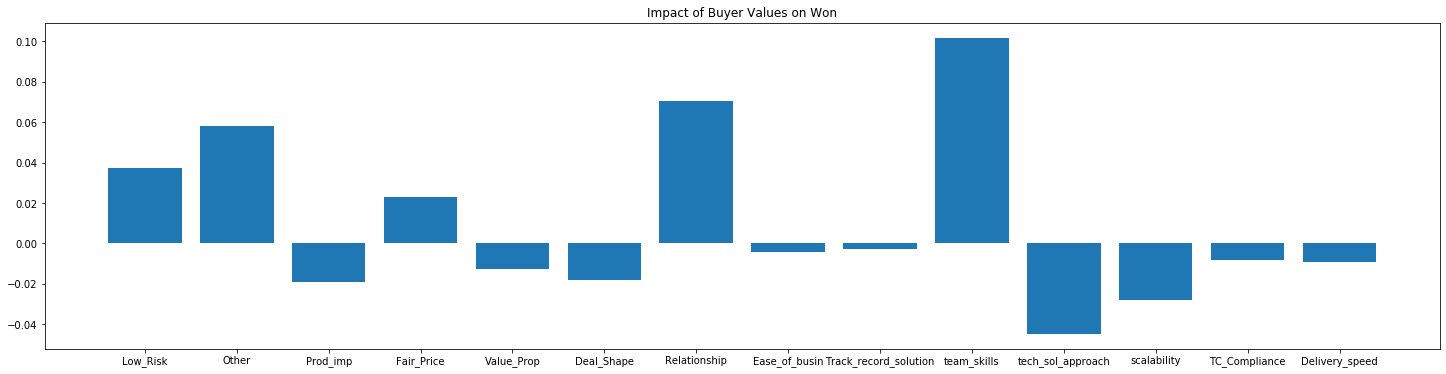

In [57]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on Won")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["Won"])[:14])

<BarContainer object of 14 artists>

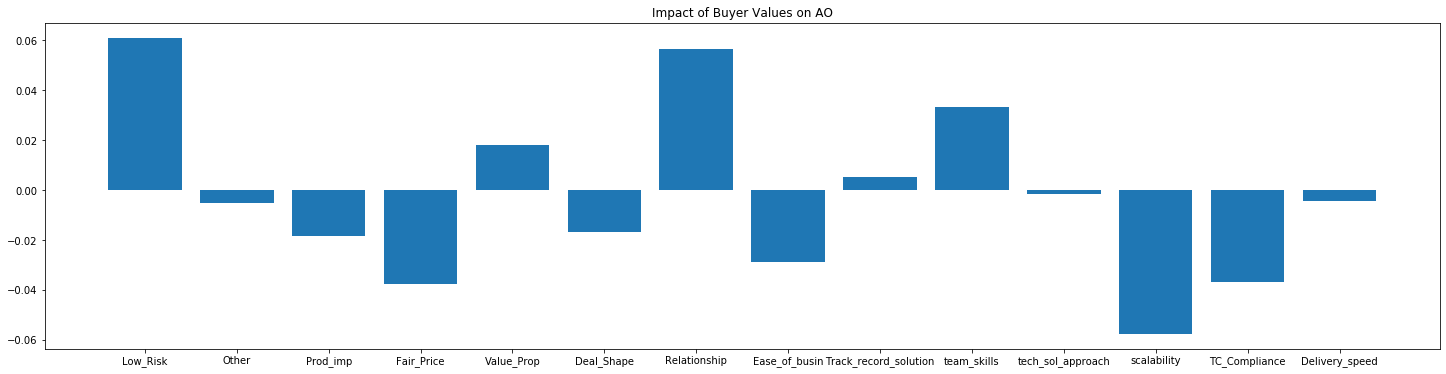

In [58]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on AO")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["AO_"])[:14])

<BarContainer object of 14 artists>

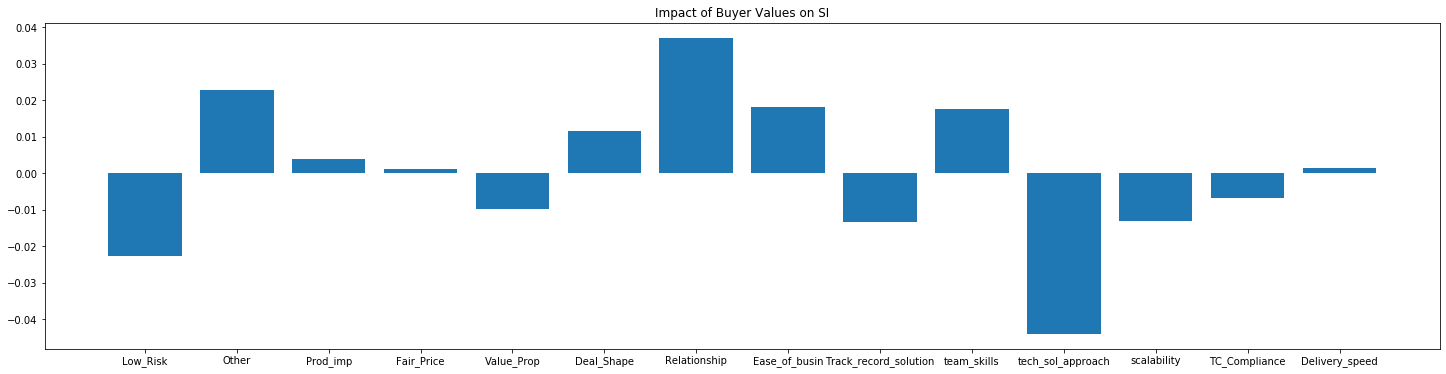

In [59]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on SI")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["SI_"])[:14])

<BarContainer object of 14 artists>

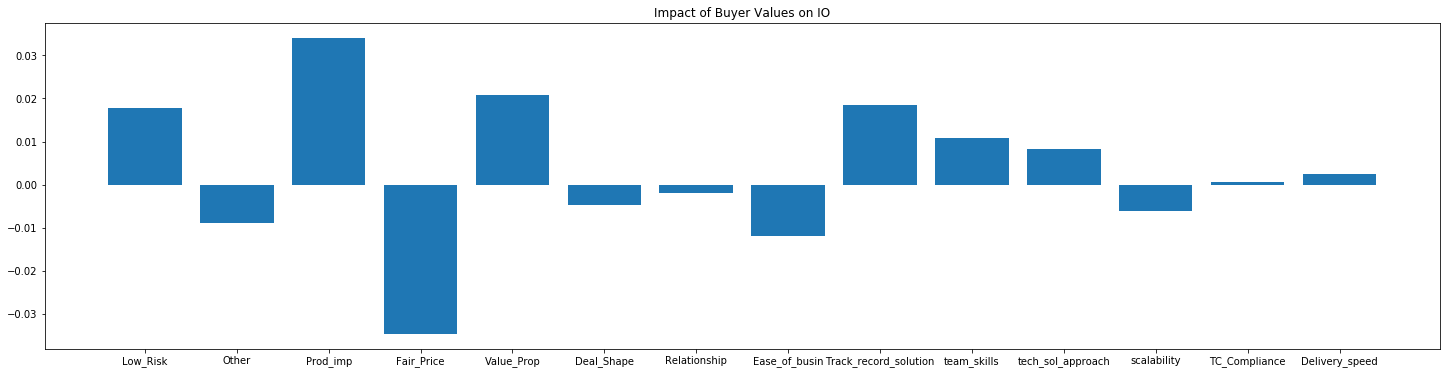

In [60]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on IO")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["IO_"])[:14])

<BarContainer object of 14 artists>

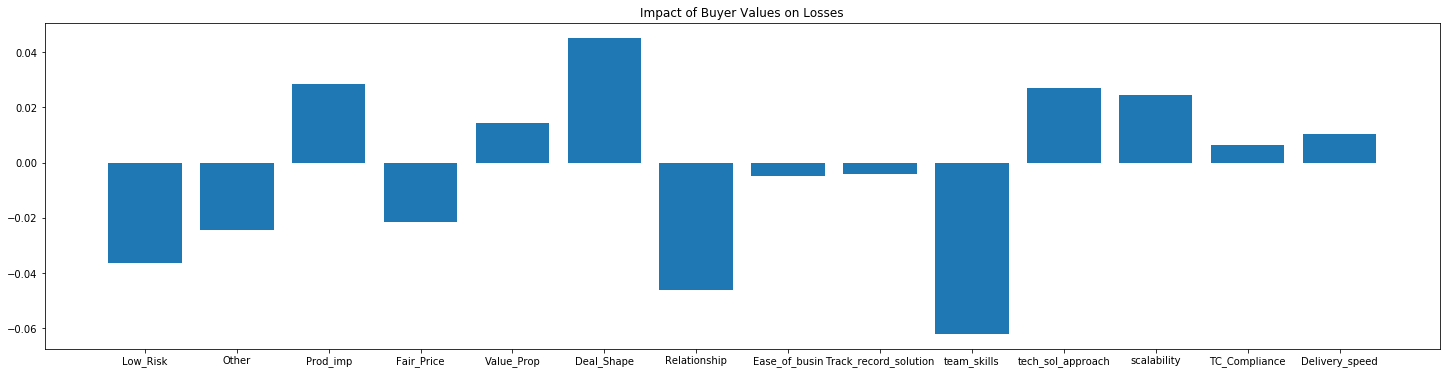

In [61]:
plt.figure (figsize = (25,6))
plt.title("Impact of Buyer Values on Losses")
plt.bar(corr_matrix.columns[:14], np.array(corr_matrix["Withdraw"])[:14])

In [62]:
y = buyer_values_small.pop("Won")

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       472
           1       1.00      0.02      0.04       187

    accuracy                           0.72       659
   macro avg       0.86      0.51      0.44       659
weighted avg       0.80      0.72      0.61       659

[[472   0]
 [183   4]]


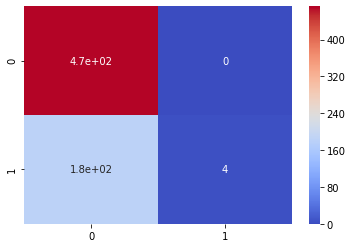

In [63]:
x = buyer_values_small
x = x.drop(["Withdraw","Rev_","AO_","SI_","IO_"],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
#knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean", weights = "uniform")
#knn_classifier.fit(x_train, y_train)
#y_pred_knn = knn_classifier.predict(x_test)
svc_ = SVC()
svc_.fit(x_train, y_train)
y_pred_svc = svc_.predict(x_test)
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
cm = confusion_matrix(y_test, y_pred_svc, labels = [0, 1])
plt.figure (figsize = (6,4))
sns.heatmap (cm, annot = True, cmap = "coolwarm")